In [7]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# **Step-2**

**Loading the Dataset**

In [13]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load QMNIST dataset and preprocess
train_dataset = datasets.QMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.QMNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

**Visualizing the data**

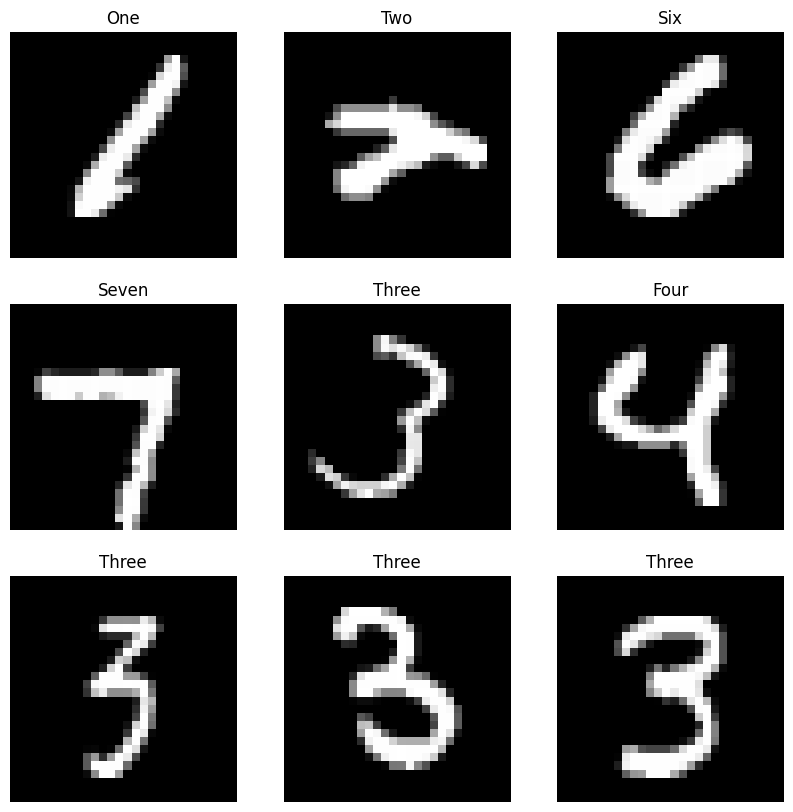

In [14]:
import matplotlib.pyplot as plt

# Numeric to string label mapping
digit_labels = {
    0: "Zero", 1: "One", 2: "Two", 3: "Three", 4: "Four",
    5: "Five", 6: "Six", 7: "Seven", 8: "Eight", 9: "Nine"
}

# Image processing steps
image_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Added normalization
])

# Loading the QMNIST training data
qmnist_training = datasets.QMNIST(root='./data_qmnist', train=True, download=True, transform=image_transforms)

# Setting up the figure for visualization
visual_figure = plt.figure(figsize=(10, 10))  # Adjusted figure size
columns, rows = 3, 3  # Kept the same but can change as needed

# Displaying images from the dataset
for i in range(1, columns * rows + 1):
    sample_index = torch.randint(len(qmnist_training), size=(1,)).item()
    image, digit = qmnist_training[sample_index]
    visual_figure.add_subplot(rows, columns, i)
    plt.title(digit_labels[digit])
    plt.axis("off")
    plt.imshow(image.squeeze(), cmap="gray")  # Ensuring grayscale display

plt.show()



**Defining the neural network**

In [15]:
import torch
from torch import nn

# Define a custom neural network architecture
class CustomFeedforwardNN(nn.Module):
    def __init__(self):
        super(CustomFeedforwardNN, self).__init__()
        # Define the first fully connected layer
        self.first_layer = nn.Linear(784, 128)  # 28*28 pixels input, 128 neurons
        # Define the second fully connected layer
        self.second_layer = nn.Linear(128, 64)  # 128 neurons, 64 neurons
        # Define the output layer
        self.output_layer = nn.Linear(64, 10)  # 64 neurons, 10 output classes

    def forward(self, input_tensor):
        # Flatten the input tensor to fit the input layer
        input_tensor = input_tensor.view(-1, 784)  # Flatten the image to a vector
        # Apply ReLU activation function after first layer
        input_tensor = torch.relu(self.first_layer(input_tensor))
        # Apply ReLU activation function after second layer
        input_tensor = torch.relu(self.second_layer(input_tensor))
        # No activation function after the output layer
        input_tensor = self.output_layer(input_tensor)
        return input_tensor

# Initialize the custom neural network
custom_model = CustomFeedforwardNN()


In [16]:
import torch.optim as optim

# Configure the loss function and optimizer for the custom model
loss_function = nn.CrossEntropyLoss()
model_optimizer = optim.Adam(custom_model.parameters(), lr=0.001)  # Adjusted learning rate if needed

# Set the number of training epochs
training_epochs = 10

# Start the training process
for epoch in range(training_epochs):
    custom_model.train()  # Ensure the model is in training mode
    total_loss = 0.0  # Accumulate loss for reporting

    # Iterate over the training data
    for batch_index, (inputs, targets) in enumerate(train_loader):
        model_optimizer.zero_grad()  # Clear gradients for the next train steps
        predictions = custom_model(inputs)  # Generate predictions
        batch_loss = loss_function(predictions, targets)  # Calculate loss
        batch_loss.backward()  # Backpropagate the error
        model_optimizer.step()  # Adjust model parameters

        total_loss += batch_loss.item()  # Update total loss
        # Log the loss every 200 mini-batches instead of 100 for a change
        if batch_index % 200 == 199:
            print(f'Epoch {epoch + 1}, Batch {batch_index + 1}, Loss: {total_loss / 200:.4f}')
            total_loss = 0.0  # Reset total loss after logging

print('Training Complete')


Epoch 1, Batch 200, Loss: 0.7204
Epoch 1, Batch 400, Loss: 0.3526
Epoch 1, Batch 600, Loss: 0.3063
Epoch 1, Batch 800, Loss: 0.2600
Epoch 2, Batch 200, Loss: 0.2190
Epoch 2, Batch 400, Loss: 0.1895
Epoch 2, Batch 600, Loss: 0.1782
Epoch 2, Batch 800, Loss: 0.1641
Epoch 3, Batch 200, Loss: 0.1385
Epoch 3, Batch 400, Loss: 0.1364
Epoch 3, Batch 600, Loss: 0.1361
Epoch 3, Batch 800, Loss: 0.1218
Epoch 4, Batch 200, Loss: 0.1135
Epoch 4, Batch 400, Loss: 0.1095
Epoch 4, Batch 600, Loss: 0.1073
Epoch 4, Batch 800, Loss: 0.1015
Epoch 5, Batch 200, Loss: 0.0894
Epoch 5, Batch 400, Loss: 0.0823
Epoch 5, Batch 600, Loss: 0.0894
Epoch 5, Batch 800, Loss: 0.0959
Epoch 6, Batch 200, Loss: 0.0753
Epoch 6, Batch 400, Loss: 0.0704
Epoch 6, Batch 600, Loss: 0.0758
Epoch 6, Batch 800, Loss: 0.0768
Epoch 7, Batch 200, Loss: 0.0668
Epoch 7, Batch 400, Loss: 0.0734
Epoch 7, Batch 600, Loss: 0.0690
Epoch 7, Batch 800, Loss: 0.0675
Epoch 8, Batch 200, Loss: 0.0596
Epoch 8, Batch 400, Loss: 0.0577
Epoch 8, B

# **Step-3**

**Evaluating the results**

In [17]:
# Set the model to evaluation mode
custom_model.eval()

# Initialize counters for correct predictions and the total number of samples
correct_predictions = 0
total_samples = 0

# Disable gradient calculation for evaluation, which saves memory and computations
with torch.no_grad():
    for batch in train_loader:  # Iterate over the entire dataset
        batch_images, batch_labels = batch  # Unpack the batch
        batch_outputs = custom_model(batch_images)  # Get model predictions
        _, predicted_labels = torch.max(batch_outputs.data, 1)  # Find the predicted class

        total_samples += batch_labels.size(0)  # Update total sample count
        correct_predictions += (predicted_labels == batch_labels).sum().item()  # Count correct predictions

# Calculate and print the accuracy
accuracy = correct_predictions / total_samples * 100
print(f'Accuracy on the training set: {accuracy:.3f}%')


Accuracy on the training set: 98.615%


In [18]:
# Switch the model to evaluation mode to disable dropout and batch normalization effects
custom_model.eval()

# Initialize counters for accurately predicted samples and the total count of samples
accurate_predictions = 0
samples_count = 0

# Deactivate gradient tracking for evaluation to reduce memory consumption and computations
with torch.no_grad():
    for batch_data in test_loader:  # Iterate through each batch in the test dataset
        test_images, test_labels = batch_data  # Unpack images and labels from the current batch
        test_outputs = custom_model(test_images)  # Compute the model's predictions

        # Determine the predicted class with the highest score for each image
        _, predictions = torch.max(test_outputs.data, 1)

        # Update the total number of samples processed
        samples_count += test_labels.size(0)

        # Increment the count of correct predictions
        accurate_predictions += (predictions == test_labels).sum().item()

# Calculate the overall accuracy by dividing the number of correct predictions by the total number of samples
accuracy_percentage = (accurate_predictions / samples_count) * 100

# Display the calculated accuracy on the test set
print(f'Accuracy on the test set: {accuracy_percentage:.3f}%')


Accuracy on the test set: 97.170%


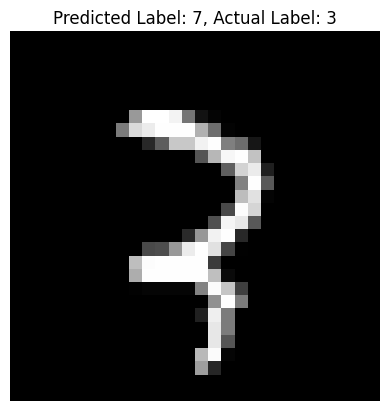

In [20]:
# Assuming 'model_predictions' contains predicted labels from the previous code snippet
# and 'test_loader' was used to obtain 'images' and 'labels'

# Select the first test image and its corresponding label for demonstration
test_image, actual_label = images[0], labels[0]

# Reshape the test image to its original 2D shape (28x28 for MNIST)
reshaped_test_image = test_image.view(28, 28)

# Convert the reshaped test image to a numpy array for plotting
image_for_plot = reshaped_test_image.numpy()

# Display the test image
plt.imshow(image_for_plot, cmap='gray')  # Use grayscale color map for visualization
# Title with predicted and actual label. Assuming the first prediction corresponds to the first test image
plt.title(f'Predicted Label: {model_predictions[0]}, Actual Label: {actual_label.item()}')
plt.axis('off')  # Hide axes for better visual presentation
plt.show()



**Accuracy of training set=98.61**
**Accuracy of testing data=97.17**

# **Step-4**


**Increase the current number of nodes in the layer to 256**

Hypothesis-
It is expected that increasing  the numbert of nodes within the model would lead to improved outcomes, as this increase in nodes enhances the model's capability to encapsulate complex interactions among the input variables, thereby strengthening its representational power.

# **Step-5**

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define an enhanced neural network architecture
class EnhancedMLP(nn.Module):
    def __init__(self):
        super(EnhancedMLP, self).__init__()
        # Adjusting layer sizes as per proposed modification
        self.dense1 = nn.Linear(784, 256)  # From input images to hidden layer 1
        self.dense2 = nn.Linear(256, 256)  # Hidden layer 1 to hidden layer 2
        self.dense3 = nn.Linear(256, 10)   # Hidden layer 2 to output layer

    def forward(self, x):
        # Flatten the input and pass through the network
        x = x.view(-1, 784)  # Flatten image to 1D tensor
        x = torch.relu(self.dense1(x))
        x = torch.relu(self.dense2(x))
        x = self.dense3(x)
        return x

# Initialize the enhanced model
enhanced_model = EnhancedMLP()

# Setup the loss function and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(enhanced_model.parameters(), lr=0.001)

# Training the enhanced neural network
epochs = 10
for epoch in range(epochs):
    enhanced_model.train()
    epoch_loss = 0.0
    for i, (inputs, targets) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = enhanced_model(inputs)
        loss = loss_function(outputs, targets)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        if i % 100 == 99:
            print(f'Epoch {epoch + 1}, Step {i + 1}: Avg Loss = {epoch_loss / 100:.4f}')
            epoch_loss = 0.0

print('Training Complete')

# Evaluating the model's performance on the training set
enhanced_model.eval()
train_correct, train_total = 0, 0
with torch.no_grad():
    for inputs, targets in train_loader:
        outputs = enhanced_model(inputs)
        _, predictions = torch.max(outputs, 1)
        train_total += targets.size(0)
        train_correct += (predictions == targets).sum().item()
print(f'\nTraining Set Accuracy: {train_correct / train_total * 100:.2f}%')

# Evaluating the model's performance on the test set
test_correct, test_total = 0, 0
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = enhanced_model(inputs)
        _, predictions = torch.max(outputs, 1)
        test_total += targets.size(0)
        test_correct += (predictions == targets).sum().item()
print(f'\nTest Set Accuracy: {test_correct / test_total * 100:.2f}%')


Epoch 1, Step 100: Avg Loss = 0.8546
Epoch 1, Step 200: Avg Loss = 0.3999
Epoch 1, Step 300: Avg Loss = 0.3522
Epoch 1, Step 400: Avg Loss = 0.2904
Epoch 1, Step 500: Avg Loss = 0.2483
Epoch 1, Step 600: Avg Loss = 0.2401
Epoch 1, Step 700: Avg Loss = 0.1913
Epoch 1, Step 800: Avg Loss = 0.1940
Epoch 1, Step 900: Avg Loss = 0.1963
Epoch 2, Step 100: Avg Loss = 0.1636
Epoch 2, Step 200: Avg Loss = 0.1513
Epoch 2, Step 300: Avg Loss = 0.1379
Epoch 2, Step 400: Avg Loss = 0.1615
Epoch 2, Step 500: Avg Loss = 0.1563
Epoch 2, Step 600: Avg Loss = 0.1292
Epoch 2, Step 700: Avg Loss = 0.1383
Epoch 2, Step 800: Avg Loss = 0.1369
Epoch 2, Step 900: Avg Loss = 0.1257
Epoch 3, Step 100: Avg Loss = 0.1124
Epoch 3, Step 200: Avg Loss = 0.1148
Epoch 3, Step 300: Avg Loss = 0.1098
Epoch 3, Step 400: Avg Loss = 0.1108
Epoch 3, Step 500: Avg Loss = 0.1045
Epoch 3, Step 600: Avg Loss = 0.1130
Epoch 3, Step 700: Avg Loss = 0.0917
Epoch 3, Step 800: Avg Loss = 0.1015
Epoch 3, Step 900: Avg Loss = 0.1022
E

# **Step-6**

Training Set Accuracy: 99.01%

Test Set Accuracy: 97.31%

As we can see,increasing the number of nodes increases the accuracy slightly


# **Step-7**

Experiment with different optimizers, loss functions, dropout, and activation functions, and observe the change in performance as you tune these hyperparameters.

**Experiment-1**
Using SGD optimizer instead of Adam

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the neural network architecture with the original configuration
class EnhancedMLP(nn.Module):
    def __init__(self):
        super(EnhancedMLP, self).__init__()
        self.dense1 = nn.Linear(784, 256)
        self.dense2 = nn.Linear(256, 256)
        self.dense3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = torch.relu(self.dense1(x))
        x = torch.relu(self.dense2(x))
        x = self.dense3(x)
        return x

# Initialize the model
model_exp1 = EnhancedMLP()

# Setup the loss function
loss_function = nn.CrossEntropyLoss()

# Use SGD optimizer instead of Adam
optimizer = optim.SGD(model_exp1.parameters(), lr=0.01, momentum=0.9)

# Placeholder for train_loader and test_loader
# Assuming train_loader and test_loader are predefined

# Training loop
epochs = 10
for epoch in range(epochs):
    model_exp1.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model_exp1(inputs)
        loss = loss_function(outputs, targets)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch + 1} complete.')

# Evaluation on training set
correct, total = 0, 0
model_exp1.eval()
with torch.no_grad():
    for inputs, targets in train_loader:
        outputs = model_exp1(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()
print(f'\nTraining Set Accuracy: {100 * correct / total}%')

# Evaluation on test set
correct, total = 0, 0
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model_exp1(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()
print(f'Test Set Accuracy: {100 * correct / total}%')


Epoch 1 complete.
Epoch 2 complete.
Epoch 3 complete.
Epoch 4 complete.
Epoch 5 complete.
Epoch 6 complete.
Epoch 7 complete.
Epoch 8 complete.
Epoch 9 complete.
Epoch 10 complete.

Training Set Accuracy: 99.155%
Test Set Accuracy: 97.50166666666667%


**Observation: There is a slight change in model performance.**

**Experiment-2**
Introducing Dropout and Using LeakyReLU Activation Function

In [23]:

# Define the enhanced neural network architecture with dropout and LeakyReLU
class EnhancedMLPWithDropoutAndLeakyReLU(nn.Module):
    def __init__(self):
        super(EnhancedMLPWithDropoutAndLeakyReLU, self).__init__()
        self.dense1 = nn.Linear(784, 256)
        self.dropout1 = nn.Dropout(0.5)  # Add dropout with a probability of 0.5
        self.dense2 = nn.Linear(256, 256)
        self.dropout2 = nn.Dropout(0.5)  # Add another dropout layer
        self.dense3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = torch.nn.functional.leaky_relu(self.dense1(x))  # Use LeakyReLU
        x = self.dropout1(x)
        x = torch.nn.functional.leaky_relu(self.dense2(x))  # Use LeakyReLU again
        x = self.dropout2(x)
        x = self.dense3(x)
        return x

# Initialize the model with dropout and LeakyReLU
model_exp2 = EnhancedMLPWithDropoutAndLeakyReLU()

# Setup the loss function
loss_function = nn.CrossEntropyLoss()

# Use Adam optimizer (or any other optimizer of choice)
optimizer = optim.Adam(model_exp2.parameters(), lr=0.001)

# Placeholder for train_loader and test_loader

# Training loop
epochs = 10
for epoch in range(epochs):
    model_exp2.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model_exp2(inputs)
        loss = loss_function(outputs, targets)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch + 1} complete.')

# Evaluation on training set
correct, total = 0, 0
model_exp2.eval()
with torch.no_grad():
    for inputs, targets in train_loader:
        outputs = model_exp2(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()
print(f'\nTraining Set Accuracy: {100 * correct / total}%')

# Evaluation on test set
correct, total = 0, 0
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model_exp2(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()
print(f'Test Set Accuracy: {100 * correct / total}%')


Epoch 1 complete.
Epoch 2 complete.
Epoch 3 complete.
Epoch 4 complete.
Epoch 5 complete.
Epoch 6 complete.
Epoch 7 complete.
Epoch 8 complete.
Epoch 9 complete.
Epoch 10 complete.

Training Set Accuracy: 97.375%
Test Set Accuracy: 96.58%


**Observation: There is a decrease in model performance.**

**Experiment-3**
Adding Batch Normalization and Changing to the RMSprop Optimizer


In [24]:
import torch
import torch.nn as nn
import torch.optim as optim

class EnhancedMLPWithBatchNorm(nn.Module):
    def __init__(self):
        super(EnhancedMLPWithBatchNorm, self).__init__()
        self.dense1 = nn.Linear(784, 256)
        self.bn1 = nn.BatchNorm1d(256)  # Batch Normalization layer for first dense layer
        self.dense2 = nn.Linear(256, 256)
        self.bn2 = nn.BatchNorm1d(256)  # Batch Normalization layer for second dense layer
        self.dense3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.bn1(self.dense1(x))
        x = torch.relu(x)
        x = self.bn2(self.dense2(x))
        x = torch.relu(x)
        x = self.dense3(x)
        return x

# Initialize the model with batch normalization
model_exp3 = EnhancedMLPWithBatchNorm()

# Setup the loss function
loss_function = nn.CrossEntropyLoss()

# Use RMSprop optimizer
optimizer = optim.RMSprop(model_exp3.parameters(), lr=0.001)

# Training loop
epochs = 10
for epoch in range(epochs):
    model_exp3.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model_exp3(inputs)
        loss = loss_function(outputs, targets)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch + 1} complete.')

# Evaluation on training set
correct, total = 0, 0
model_exp3.eval()
with torch.no_grad():
    for inputs, targets in train_loader:
        outputs = model_exp3(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()
print(f'\nTraining Set Accuracy: {100 * correct / total}%')

# Evaluation on test set
correct, total = 0, 0
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model_exp3(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()
print(f'Test Set Accuracy: {100 * correct / total}%')


Epoch 1 complete.
Epoch 2 complete.
Epoch 3 complete.
Epoch 4 complete.
Epoch 5 complete.
Epoch 6 complete.
Epoch 7 complete.
Epoch 8 complete.
Epoch 9 complete.
Epoch 10 complete.

Training Set Accuracy: 99.725%
Test Set Accuracy: 97.95166666666667%


**Observation:Model performance increases.**